## Problem Statement

The objective of this project is to develop a supervised linear regression model for predicting car mileage based on various features and attributes. The dataset consists of historical data about different cars, including factors such as engine size, horsepower, weight, and other relevant specifications. The goal is to create an accurate and reliable model that can estimate the mileage (fuel efficiency) of a car given its characteristics.

## Dataset Download Link

http://courses.washington.edu/hcde511/s14/datasets/cars.xls

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Data

In [2]:
cars_data = pd.read_excel("D:\\Self Made Learning Projects\\Linear Regression\\Predict Car Mileage\\Datasets\\Cars Dataset.xlsx")

## Understanding the Data

The dataset comprises details about various car models, encompassing their corresponding fuel efficiency (MPG) values. The features encompass cylinders, engine displacement, horsepower, weight, acceleration, manufacturing year, and the origin of the car.

In [3]:
cars_data.shape

(394, 9)

In [4]:
cars_data.columns

Index(['Model', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Year', 'Origin'],
      dtype='object')

In [5]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         394 non-null    object 
 1   MPG           394 non-null    float64
 2   Cylinders     394 non-null    int64  
 3   Displacement  394 non-null    float64
 4   Horsepower    392 non-null    float64
 5   Weight        394 non-null    int64  
 6   Acceleration  394 non-null    float64
 7   Year          394 non-null    int64  
 8   Origin        394 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 27.8+ KB


## Data Preprocessing

In [6]:
cars_data.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,US
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,US
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,US
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,US
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,US


In [7]:
cars_data.isnull().sum()

Model           0
MPG             0
Cylinders       0
Displacement    0
Horsepower      2
Weight          0
Acceleration    0
Year            0
Origin          0
dtype: int64

In [8]:
cars_data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
count,394.000000,394.000000,394.000000,392.000000,394.000000,394.000000,394.000000
mean,23.472843,5.464467,194.062183,104.469388,2976.060914,15.554569,76.007614
std,7.805051,1.704658,104.508345,38.491160,847.891143,2.763179,3.695461
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.125000,4.000000,105.000000,75.000000,2226.500000,13.800000,73.000000
50%,23.000000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,265.750000,126.000000,3612.000000,17.075000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [9]:
cars_data.loc[~cars_data.Horsepower.apply(np.isreal)]

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin


In [10]:
cars_data['Horsepower'].replace(0, np.nan, inplace =True)

In [11]:
cars_data['Horsepower'] = cars_data['Horsepower'].fillna(cars_data['Horsepower'].mean())

Replacing Null Values of Horsepower with Mean Value

In [12]:
cars_data.isnull().sum()

Model           0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Year            0
Origin          0
dtype: int64

In [13]:
cars_data.dtypes

Model            object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Year              int64
Origin           object
dtype: object

In [14]:
cars_data["Horsepower"] = cars_data["Horsepower"].astype('int64')

In [15]:
cars_data.dtypes

Model            object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Year              int64
Origin           object
dtype: object

## Non-Graphical Univariate Analysis

In [16]:
cars_data['Origin'].unique()

array(['US', 'Japan', 'Europe'], dtype=object)

In [17]:
cars_data['Cylinders'].value_counts()

4    201
8    103
6     83
3      4
5      3
Name: Cylinders, dtype: int64

In [18]:
data_4cylinder = cars_data[(cars_data['Cylinders']==4)]

In [19]:
data_4cylinder.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
14,toyota corona mark ii,24.0,4,113.0,95,2372,15.0,70,Japan
18,datsun pl510,27.0,4,97.0,88,2130,14.5,70,Japan
19,volkswagen 1131 deluxe sedan,26.0,4,97.0,46,1835,20.5,70,Europe
20,peugeot 504,25.0,4,110.0,87,2672,17.5,70,Europe
21,audi 100 ls,24.0,4,107.0,90,2430,14.5,70,Europe


In [20]:
data_4cylinder.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
count,201.000000,201.0,201.000000,201.000000,201.00000,201.000000,201.000000
mean,29.278607,4.0,109.828358,78.537313,2308.81592,16.597512,77.074627
std,5.671595,0.0,21.479796,14.675144,345.01703,2.387958,3.745584
min,18.000000,4.0,68.000000,46.000000,1613.00000,11.600000,70.000000
25%,25.000000,4.0,91.000000,68.000000,2050.00000,14.800000,74.000000
50%,28.400000,4.0,105.000000,78.000000,2234.00000,16.200000,78.000000
75%,33.000000,4.0,121.000000,89.000000,2565.00000,18.000000,80.000000
max,46.600000,4.0,156.000000,115.000000,3270.00000,24.800000,82.000000


## Graphical Univariate Analysis

<Axes: >

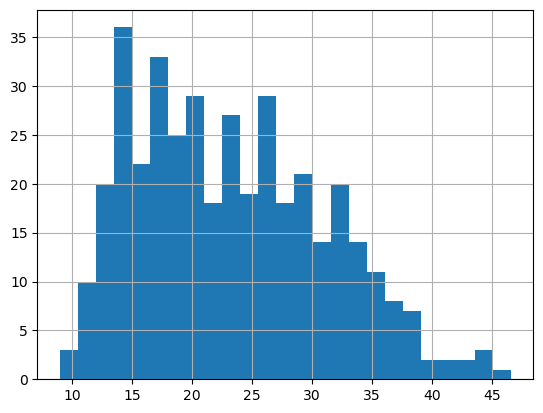

In [21]:
cars_data['MPG'].hist(bins=25)

<Figure size 640x480 with 0 Axes>

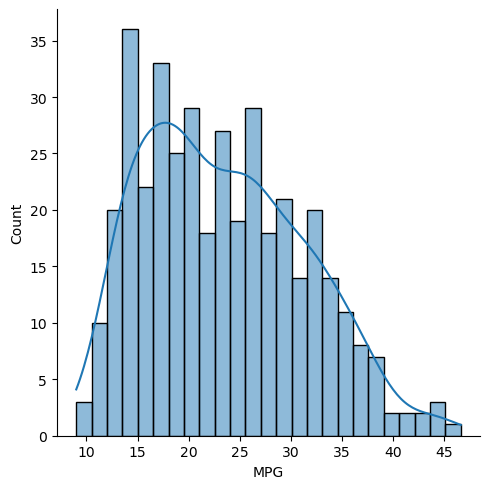

In [22]:
plt.tight_layout()
sns.displot(cars_data['MPG'], bins=25, kde=True)

## Box Plots

<Axes: >

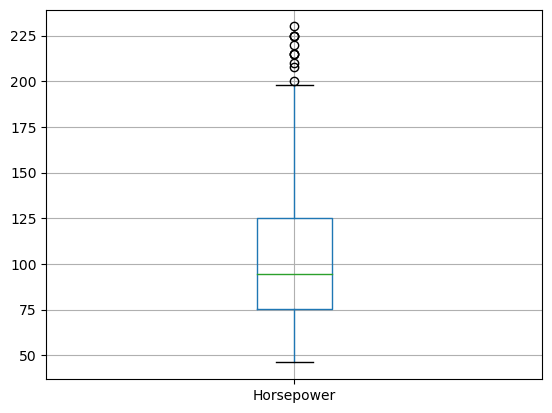

In [23]:
cars_data.boxplot(column="Horsepower")

<Axes: title={'center': 'Horsepower'}, xlabel='Cylinders'>

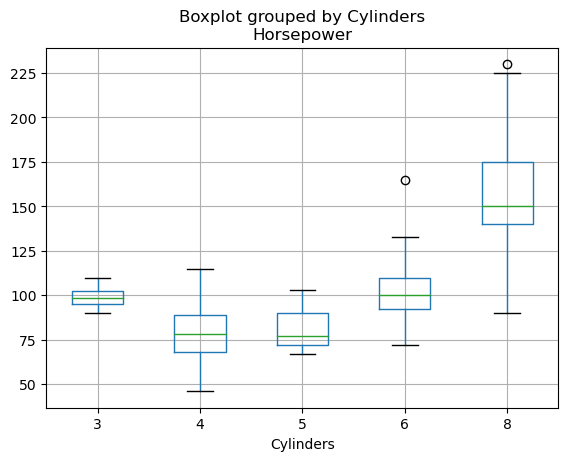

In [24]:
cars_data.boxplot(column="Horsepower", by="Cylinders")

# Dealing with Outliers

### 1. Removing the Outliers

In [25]:
upper_value = cars_data["Horsepower"].quantile(1-0.2)
upper_value

140.0

In [26]:
mask = (cars_data["Horsepower"]<upper_value)
masked_cardata = cars_data[mask]

In [27]:
masked_cardata.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,US
14,toyota corona mark ii,24.0,4,113.0,95,2372,15.0,70,Japan
15,plymouth duster,22.0,6,198.0,95,2833,15.5,70,US
16,amc hornet,18.0,6,199.0,97,2774,15.5,70,US
17,ford maverick,21.0,6,200.0,85,2587,16.0,70,US


In [28]:
masked_cardata.shape

(310, 9)

<Axes: >

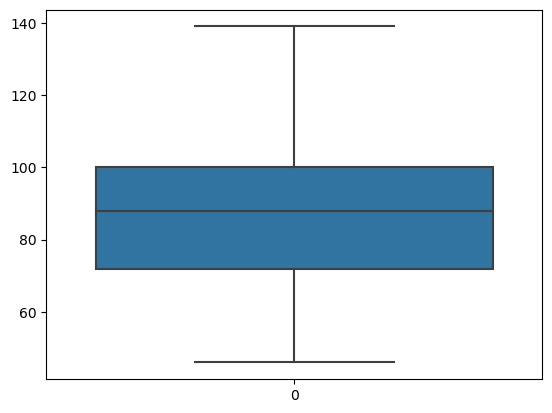

In [29]:
sns.boxplot(masked_cardata["Horsepower"])

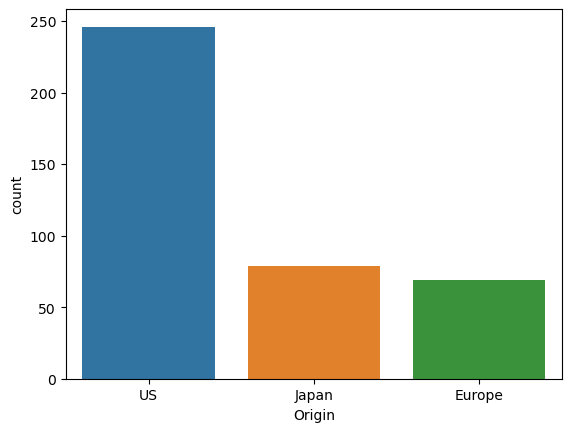

In [30]:
sns.countplot(x='Origin', data=cars_data)
plt.show()

# Non-Graphical Bivariate Analysis

In [31]:
correlation_matrix = cars_data.corr()
correlation_matrix['MPG'].sort_values()

C:\Users\sengu\AppData\Local\Temp\ipykernel_20060\3560153460.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cars_data.corr()


Weight         -0.832279
Displacement   -0.805249
Cylinders      -0.777138
Horsepower     -0.776481
Acceleration    0.420574
Year            0.580384
MPG             1.000000
Name: MPG, dtype: float64

# Graphical Bivariate Analysis

### Pair-Plot

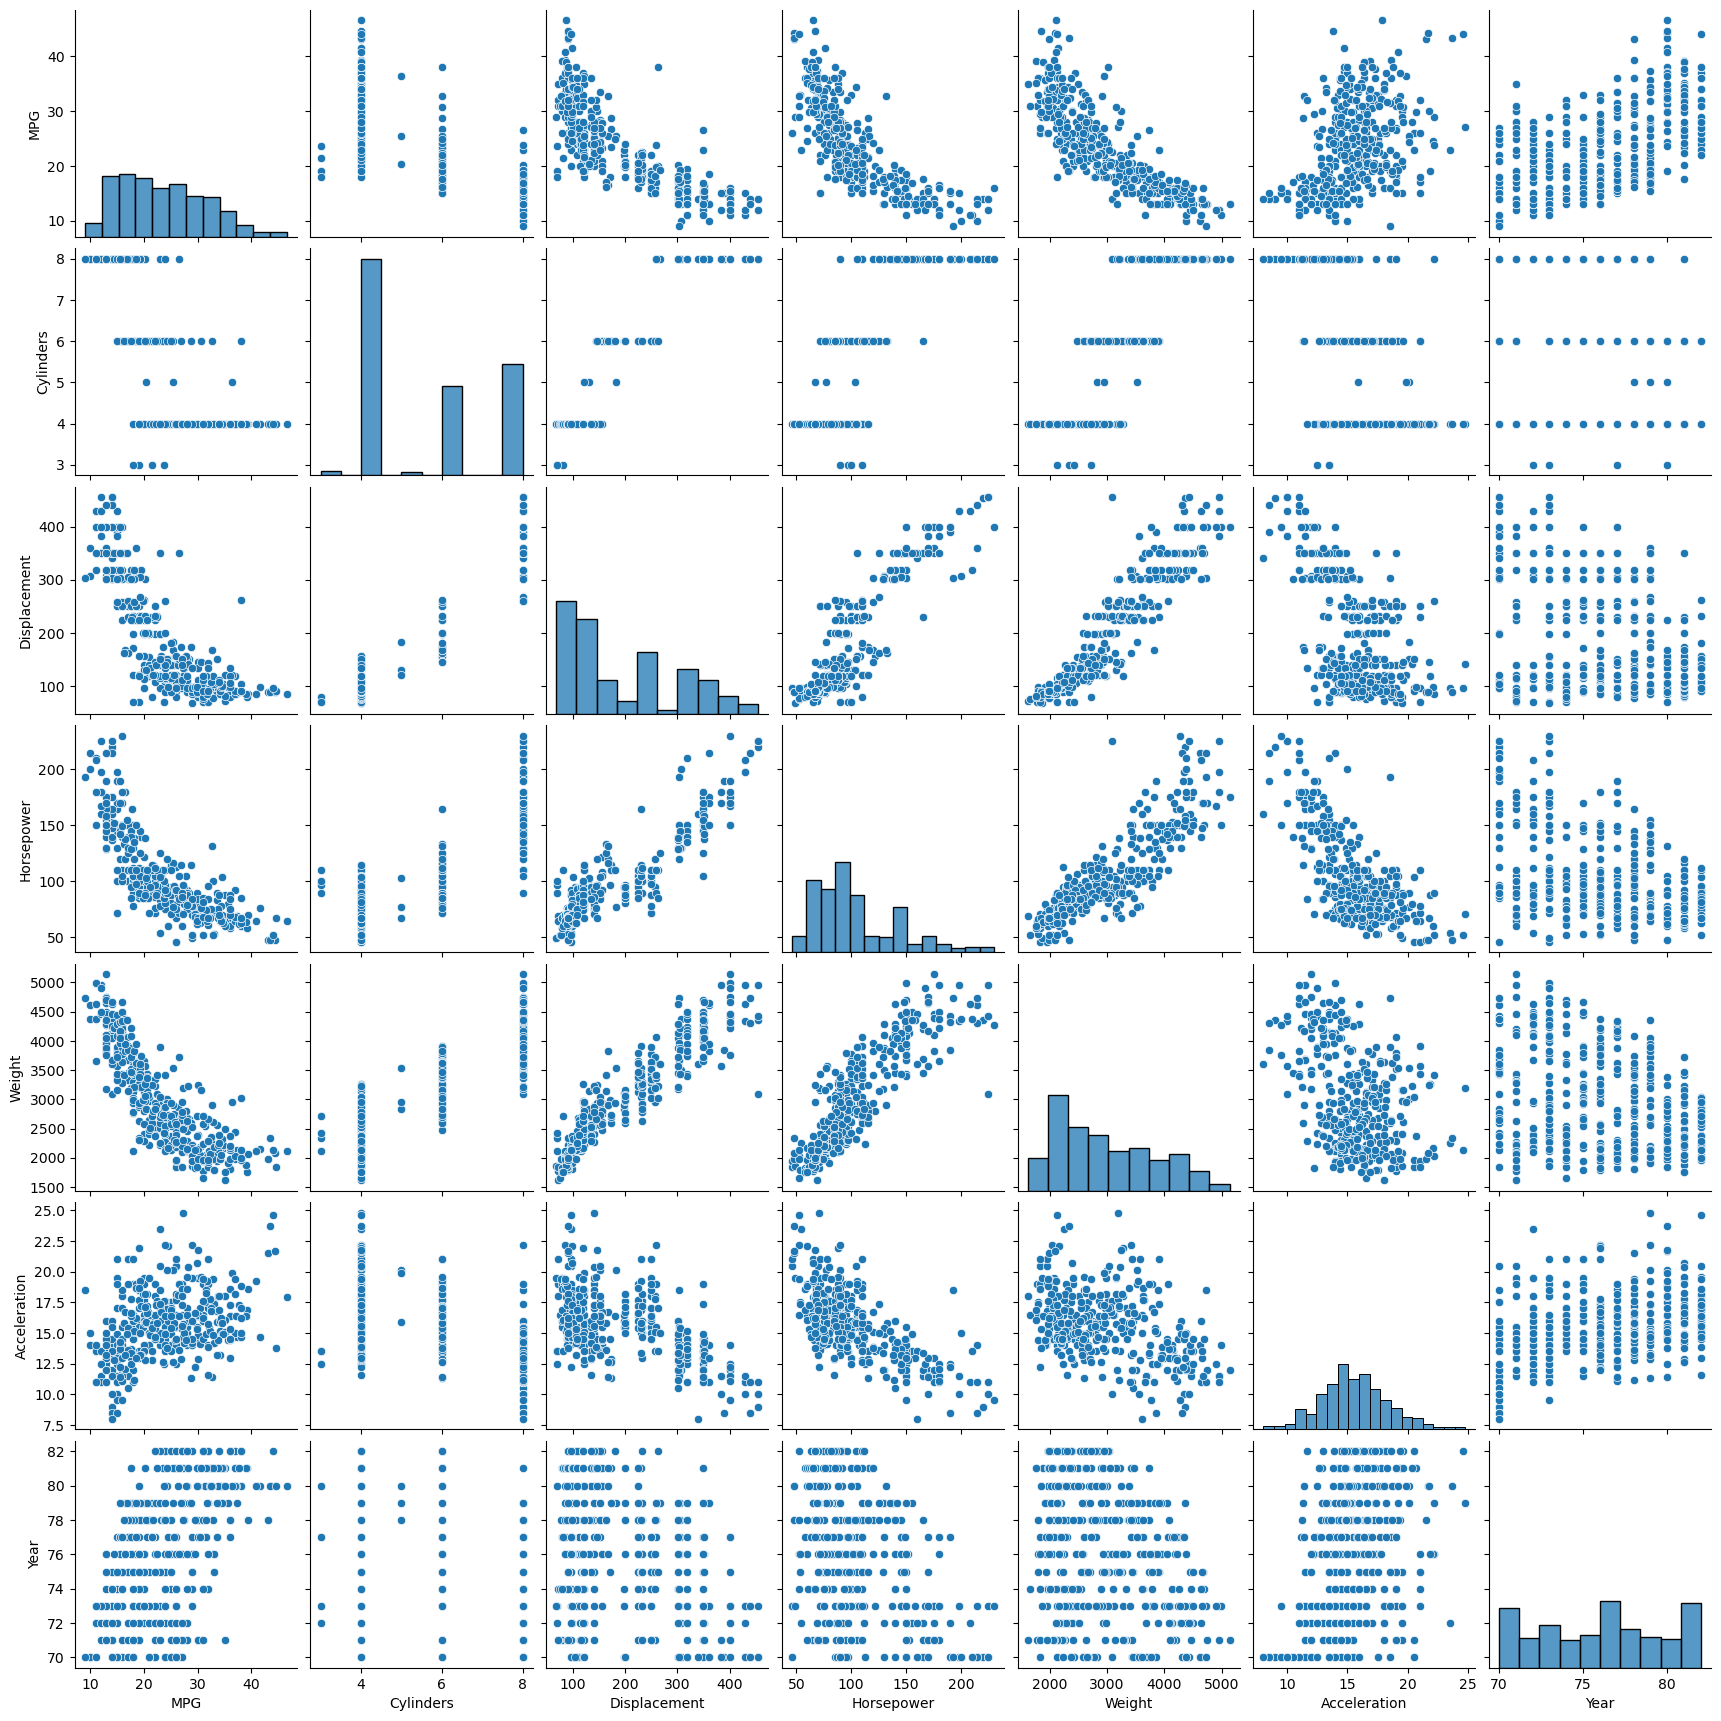

In [32]:
sns.pairplot(cars_data)

# Feature Selection

In [33]:
cars_data=pd.get_dummies(cars_data, columns=['Origin'])

In [34]:
cars_data.columns

Index(['Model', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Year', 'Origin_Europe', 'Origin_Japan', 'Origin_US'],
      dtype='object')

In [35]:
feature_variables = ['Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Year', 'Origin_Europe', 'Origin_Japan', 'Origin_US']

In [36]:
X = cars_data[feature_variables]
Y = cars_data['MPG']

# Spliting the dataset for Training and Testing

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                    test_size= 0.3, 
                                                    random_state=10)

In [39]:
X_train

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin_Europe,Origin_Japan,Origin_US
20,4,110.0,87,2672,17.5,70,1,0,0
189,6,225.0,100,3233,15.4,76,0,0,1
59,4,140.0,90,2408,19.5,72,0,0,1
333,4,107.0,72,2290,17.0,80,0,1,0
37,8,350.0,165,4209,12.0,71,0,0,1
...,...,...,...,...,...,...,...,...,...
369,4,140.0,92,2865,16.4,82,0,0,1
320,4,86.0,65,2110,17.9,80,0,1,0
15,6,198.0,95,2833,15.5,70,0,0,1
125,6,232.0,100,2901,16.0,74,0,0,1


In [40]:
X_test

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin_Europe,Origin_Japan,Origin_US
149,4,79.0,67,2000,16.0,74,1,0,0
188,8,351.0,152,4215,12.8,76,0,0,1
227,8,400.0,180,4220,11.1,77,0,0,1
294,4,121.0,80,2670,15.0,79,0,0,1
78,4,96.0,69,2189,18.0,72,1,0,0
...,...,...,...,...,...,...,...,...,...
25,8,360.0,215,4615,14.0,70,0,0,1
392,4,120.0,79,2625,18.6,82,0,0,1
212,8,302.0,130,3870,15.0,76,0,0,1
357,6,168.0,116,2900,12.6,81,0,1,0


In [41]:
Y_train

20     25.0
189    22.0
59     20.0
333    32.4
37     14.0
       ... 
369    24.0
320    46.6
15     22.0
125    19.0
265    27.5
Name: MPG, Length: 275, dtype: float64

In [42]:
Y_test

149    31.0
188    14.5
227    16.0
294    27.4
78     26.0
       ... 
25     10.0
392    28.0
212    13.0
357    25.4
163    20.0
Name: MPG, Length: 119, dtype: float64

# Training the Model

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [44]:
ln = LinearRegression()

In [45]:
ln.fit(X_train, Y_train)

LinearRegression()

In [46]:
coeff = ln.coef_

In [47]:
coeffdf = pd.DataFrame(coeff, X.columns, 
                       columns=["Co-Efficients"])
coeffdf

,Co-Efficients
Cylinders,-0.493838
Displacement,0.025440
Horsepower,-0.020734
Weight,-0.006950
Acceleration,0.049351
Year,0.818052
Origin_Europe,0.880814
Origin_Japan,0.894203
Origin_US,-1.775017


# Predictions

In [48]:
prediction = ln.predict(X_test)

In [49]:
prediction

array([29.18262228, 15.79164501, 17.15704225, 26.70983944, 26.72259894,
       21.40495071,  7.75830966, 15.07516303, 30.49437741, 25.39379474,
       17.07220938, 12.72865958, 12.6342293 , 20.88465563, 27.55839656,
       30.37168738, 31.448893  , 25.887413  , 32.02214172, 26.70897959,
       16.98393018, 27.95256004, 10.94007209, 26.16891105, 10.34852404,
       12.84267302, 20.28956799, 21.24936639, 14.15231872, 32.16235654,
       20.90699709, 23.00828211, 22.42567748, 27.2384076 , 10.74277248,
       24.38997498, 16.48947427, 17.8981937 , 11.77490079,  9.24949466,
       20.50752088,  6.0024281 , 21.36096919, 31.92339585, 19.00917984,
       20.89743933, 30.45227008, 27.16409749, 23.39171008, 22.89047395,
       31.89497647, 33.86692081, 24.36105573, 22.44236522, 24.54264752,
       25.8814901 , 27.48550487, 33.38197543, 27.18072665, 24.19496343,
       29.17501554, 15.16398393, 36.27415997, 32.20043741, 33.50430035,
       29.85217773, 14.39146525, 32.56897713, 24.39603231, 15.56

# Graphical Evaluations

Text(0.5, 1.0, 'Analyzing the Linear Model')

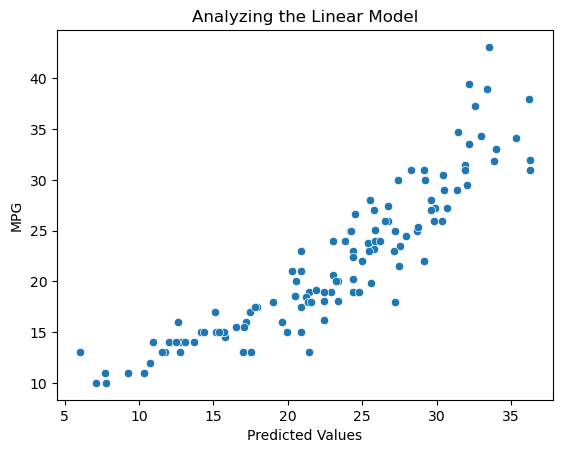

In [50]:
sns.scatterplot(x=prediction, y=Y_test)
plt.xlabel("Predicted Values")
plt.title("Analyzing the Linear Model")

# Error Analysis

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [52]:
Absolute_error = mean_absolute_error(Y_test, prediction)
Absolute_error

2.606724713349901

In [53]:
Squared_error = mean_squared_error(Y_test, prediction)
Squared_error

10.835678787219592

In [54]:
Root_Squared = math.sqrt(Squared_error)
Root_Squared

3.2917592237616033

# Residual Analysis

In [55]:
residuals = Y_test - prediction

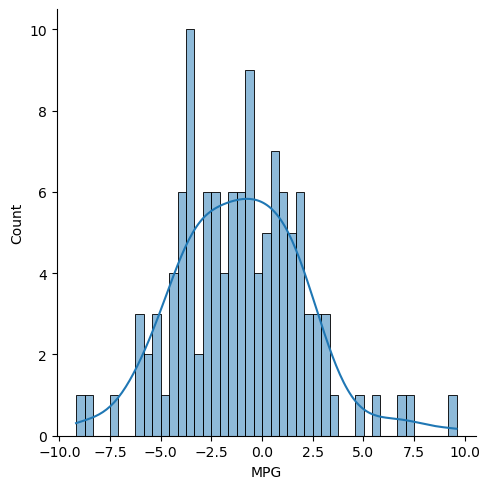

In [56]:
sns.displot(residuals, bins=45, kde=True)

# Interpretation and Context for Model Evaluation Metrics

#### Mean Absolute Error (MAE):
The Mean Absolute Error (MAE) is a measure of the average absolute differences between the predicted and actual values. In the context of this linear regression model predicting car mileage, the MAE represents the average absolute discrepancy in miles per gallon (MPG) between the actual and predicted values. For example, if the MAE is 2, it implies that, on average, the model's predictions are off by 2 MPG.

#### Mean Squared Error (MSE):
The Mean Squared Error (MSE) measures the average squared differences between predicted and actual values. In the context of this car mileage prediction model, MSE gives more weight to large errors compared to MAE. If the MSE is, for instance, 10, it implies that, on average, the squared difference between predicted and actual MPG is 10.

#### Root Mean Squared Error (RMSE):
The Root Mean Squared Error (RMSE) is the square root of the MSE and provides an interpretable metric in the same units as the target variable. It is particularly useful for understanding the magnitude of prediction errors. A RMSE of 3, for instance, means that, on average, the model's predictions deviate by 3 MPG from the actual values.

#### Contextual Interpretation:
- **MAE**: A lower MAE indicates that the model's predictions are, on average, closer to the actual MPG values. It is easily interpretable but might not penalize large errors significantly.
- **MSE**: MSE considers larger errors more seriously. A lower MSE is desirable, but it may be sensitive to outliers.
- **RMSE**: Similar to MSE but provides a more interpretable scale as it is in the same units as the target variable. A lower RMSE suggests better predictive performance.

### Residual Analysis:
The residual analysis involves studying the distribution of residuals (the differences between actual and predicted values). A symmetric and approximately normal distribution of residuals indicates that the model is capturing the underlying patterns well. Any patterns or trends in the residual plot may highlight areas where the model performs poorly or fails to capture certain characteristics.

### Graphical Evaluations:
The scatter plot of predicted vs. actual values provides a visual representation of how well the model predictions align with the true values. A perfect model would have all points lying on a diagonal line (y=x). Deviations from this line suggest areas where the model is making errors.

In conclusion, evaluating these metrics alongside graphical analyses provides a comprehensive understanding of the model's performance. Keep in mind that the choice of metric depends on the specific goals of the prediction task and the importance of different types of errors.

# Conclusions

The linear regression model demonstrated its ability to predict car mileage based on the selected features. The project involved thorough data exploration, preprocessing, and model training, providing valuable insights into the relationships within the dataset. Further refinements and optimizations can be explored to enhance the model's performance and robustness.